<h1>Gradient Twist

In [1]:
import numpy as np # linear algebra
import pandas as pd # 
import re

In [2]:
df = pd.read_csv('/kaggle/input/street-legends-seans-car-valuation-challenge/train.csv')
dftest = pd.read_csv('/kaggle/input/street-legends-seans-car-valuation-challenge/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155711 entries, 0 to 155710
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            155711 non-null  int64 
 1   brand         155711 non-null  object
 2   model         155711 non-null  object
 3   model_year    155711 non-null  int64 
 4   milage        155711 non-null  int64 
 5   fuel_type     151498 non-null  object
 6   engine        155711 non-null  object
 7   transmission  155711 non-null  object
 8   ext_col       155711 non-null  object
 9   int_col       155711 non-null  object
 10  accident      153678 non-null  object
 11  clean_title   137961 non-null  object
 12  target        155711 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 15.4+ MB


In [4]:
df = df.dropna(subset = ['fuel_type'])
df = df.dropna(subset = ['accident'])
df = df.dropna(subset = ['clean_title'])


<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Exploratory Data Analysis and Feature Engineering
</h1>

In [5]:
df.nunique()

id              134227
brand               57
model             1878
model_year          34
milage            5441
fuel_type            7
engine            1095
transmission        50
ext_col            307
int_col            152
accident             2
clean_title          1
target            1525
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


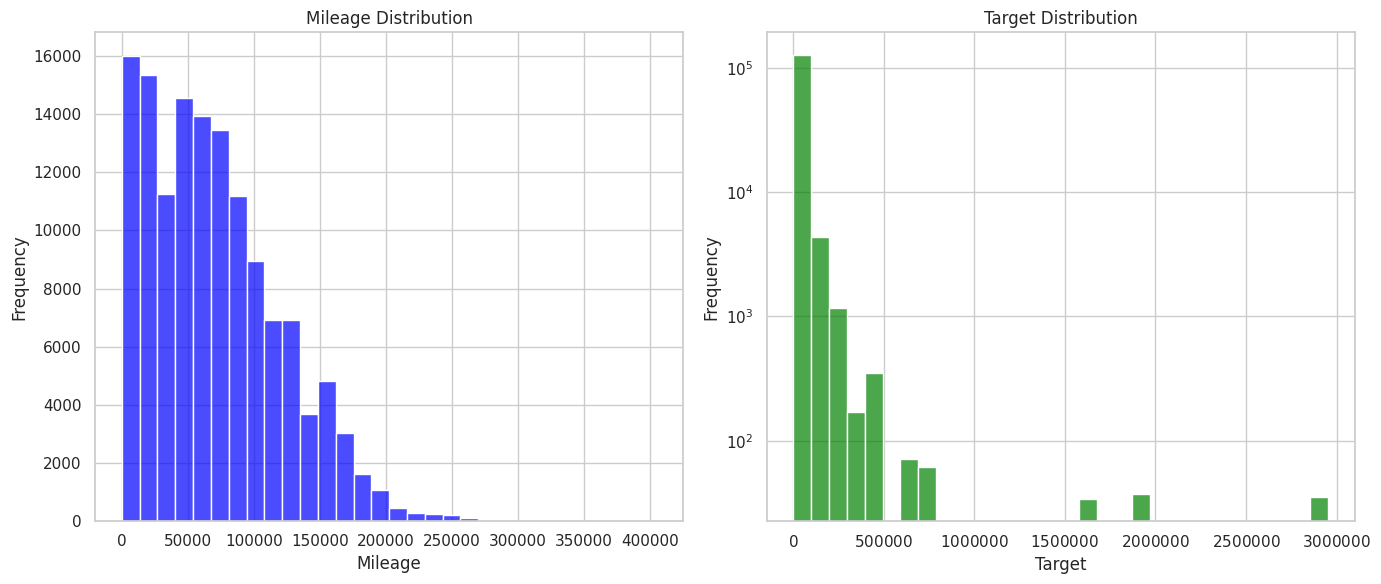

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['milage'], bins=30, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Mileage Distribution')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Frequency')
sns.histplot(df['target'], bins=30, ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Target Distribution')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Frequency')
axes[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axes[1].ticklabel_format(style='plain', axis='x')
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()


In [7]:
for column in df.columns:
    if df[column].isnull().any():  
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)  

for column in dftest.columns:
    if dftest[column].isnull().any(): 
        mode_value = dftest[column].mode()[0]  # Get the mode from train_data
        dftest[column].fillna(mode_value, inplace=True)  # Fill with mode

In [8]:
continuous = df[["milage", "target"]]
for cont in continuous:
    Q1 = df[cont].quantile(0.25)
    Q3 = df[cont].quantile(0.75)
    IQR = Q3 - Q1
    extreme_lower_bound = Q1 - (3 * IQR)
    extreme_upper_bound = Q3 + (3 * IQR)
    
    df = df[(df[cont] >= extreme_lower_bound) & (df[cont] <= extreme_upper_bound)]

In [9]:
def parser(spec):
    horsepower = r"(\d+(\.\d+)?)(\s*HP|\s*Horsepower)?"
    displacement = r"(\d+(\.\d+)?)L|\d+(\.\d+)?\sLiter"
    cylinders = r"(\d+\s*Cyl|\d+\s*Cylinder|V\d+|I\d+)"
    
    horsepower = re.search(horsepower, spec)
    displacement = re.search(displacement, spec)
    cylinders = re.search(cylinders, spec)
    
    horsepower = horsepower.group(1) + "" if horsepower and horsepower.group(3) else None
    displacement = displacement.group(0) if displacement else None
    cylinders = cylinders.group(0) if cylinders else None
    
    if displacement and "Liter" in displacement:
        displacement = displacement.replace("Liter", "")
    if displacement and "L" in displacement:
        displacement = displacement.replace("L", "")
    
    return horsepower, displacement, cylinders

#df[['horsepower', 'displacement', 'cylinders']] = df["engine"].apply(lambda x: pd.Series(parser(x)))
#dftest[['horsepower', 'displacement', 'cylinders']] = dftest["engine"].apply(lambda x: pd.Series(parser(x)))

In [10]:
df['milage'] = np.log(df['milage'] + 1)
dftest['milage'] = np.log(dftest['milage'] + 1)

#df['target'] = np.log(df['target'] + 1)

In [11]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
# cat_feats = dftest.select_dtypes('object').columns
# for feat in cat_feats:
#     cats = sorted(df[feat].dropna().unique())
#     cat_dtype = pd.CategoricalDtype(categories=cats, ordered=False)
    
#     df.loc[~df[feat].isin(cats), feat] = np.nan
#     dftest.loc[~dftest[feat].isin(cats), feat] = np.nan
    
#     df[feat] = df[feat].astype(cat_dtype)
#     dftest[feat] = dftest[feat].astype(cat_dtype)


In [13]:
df = df.drop(columns=['clean_title','ext_col','int_col','engine','id'])

clean title dropped single value

In [14]:
X = df.drop(['target'],axis=1)
y = df['target'] 

In [15]:
dftest = dftest.drop(columns=['clean_title','ext_col','int_col','engine','id'])

In [16]:
df['accident'] = df['accident'].map({'None reported': 0, 
                                       'At least 1 accident or damage reported': 1})
dftest['accident'] = dftest['accident'].map({'None reported': 0, 
                                       'At least 1 accident or damage reported': 1})
        

In [17]:
df = df.drop(columns=['transmission'])
dftest = dftest.drop(columns=['transmission'])

In [18]:
# df['cylinders'], _ = pd.factorize(df['cylinders'], sort=True)
# dftest['cylinders'], _ = pd.factorize(dftest['cylinders'], sort=True)

In [19]:
df['fuel_type'], _ = pd.factorize(df['fuel_type'], sort=True)
dftest['fuel_type'], _ = pd.factorize(dftest['fuel_type'], sort=True)

In [20]:
df.nunique()

brand           57
model         1877
model_year      34
milage        5338
fuel_type        7
accident         2
target        1408
dtype: int64

In [21]:
dftest.head()

,brand,model,model_year,milage,fuel_type,accident
0,Acura,ILX 2.0L w/Premium Package,2011,12.240962,2,1
1,Acura,ILX 2.0L w/Premium Package,2015,11.238502,2,1
2,Acura,ILX 2.0L w/Premium Package,2013,12.196027,2,1
3,Acura,ILX 2.0L w/Premium Package,2014,11.176067,2,1
4,Acura,ILX 2.0L w/Premium Package,2015,11.750059,2,1


In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [23]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32822 entries, 0 to 32821
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       32822 non-null  object 
 1   model       32822 non-null  object 
 2   model_year  32822 non-null  int64  
 3   milage      32822 non-null  float64
 4   fuel_type   32822 non-null  int64  
 5   accident    32822 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [24]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
df[categorical_features] = df[categorical_features].astype('category')
X = df.drop(columns=['target'])
y = df['target']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough')


models = [
    ('lightgbm', lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05,force_col_wise= True)),
    ('xgboost', xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)),
    #('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('linear_regression', LinearRegression())
]
voting_regressor = VotingRegressor(estimators=models)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(X.shape[0])
test_preds = np.zeros(dftest.shape[0])

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', voting_regressor)
    ])
    
    pipeline.fit(X_train, y_train)
    
    val_preds = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    print(f"RMSE for this fold: {rmse}")
    
    oof_preds[val_index] = val_preds

pipeline.fit(X, y)

dftest[categorical_features] = dftest[categorical_features].astype('category')
test_preds = pipeline.predict(dftest)


[LightGBM] [Info] Total Bins 2443
[LightGBM] [Info] Number of data points in the train set: 104505, number of used features: 1076
[LightGBM] [Info] Start training from score 33667.090656
RMSE for this fold: 15617.01318503052
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 104505, number of used features: 1058
[LightGBM] [Info] Start training from score 33642.568470
RMSE for this fold: 15560.799082055455
[LightGBM] [Info] Total Bins 2439
[LightGBM] [Info] Number of data points in the train set: 104506, number of used features: 1074
[LightGBM] [Info] Start training from score 33637.853473
RMSE for this fold: 15525.797050396865
[LightGBM] [Info] Total Bins 2443
[LightGBM] [Info] Number of data points in the train set: 104506, number of used features: 1076
[LightGBM] [Info] Start training from score 33703.372811
RMSE for this fold: 15435.59592773638
[LightGBM] [Info] Total Bins 2449
[LightGBM] [Info] Number of data points in the train set: 104506

In [25]:
ss = pd.read_csv('/kaggle/input/street-legends-seans-car-valuation-challenge/sample_submission.csv')
ss['target'] = test_preds
print(ss)
ss.to_csv('/kaggle/working/finalday.csv', index=False)


           id        target
0       32569   7419.152074
1      183983  19828.764363
2       39184  10613.590271
3       61462  18167.835856
4      186577  15531.036809
...       ...           ...
32817   40273  44462.553782
32818   73344  35060.556781
32819   88840  32918.831109
32820   67837  32923.287147
32821   14332  31366.435393

[32822 rows x 2 columns]
